<a href="https://colab.research.google.com/github/bertella/Analisis-Netflix/blob/main/AnalisisNetflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALISIS DE CONSUMO DE NETFLIX CON PYTHON

## 1. IMPORTACION Y CARGA DE DATOS

In [9]:
from google.colab import files
datos = files.upload()

Saving NetflixViewingHistory.csv to NetflixViewingHistory.csv


In [29]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(datos['NetflixViewingHistory.csv']))

## 2. ANALISIS EXPLORATORIO

In [ ]:
df.shape

(819, 2)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2435 entries, 0 to 2434
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   2418 non-null   object
 1   Date    2435 non-null   object
dtypes: object(2)
memory usage: 38.2+ KB


In [31]:
df.head(50)

,Title,Date
0,Breaking Bad: Temporada 5: Adquisición,31/1/24
1,Breaking Bad: Temporada 5: Carga de muerte,31/1/24
2,Breaking Bad: Temporada 5: 51 (Cincuenta y uno),30/1/24
3,Breaking Bad: Temporada 5: Peligro,30/1/24
4,Breaking Bad: Temporada 5: Madrigal,29/1/24
5,Breaking Bad: Temporada 5: Vive libre o muere,29/1/24
6,Breaking Bad: Temporada 4: Cara a cara,29/1/24
7,Breaking Bad: Temporada 4: Fin de los tiempos,28/1/24
8,Breaking Bad: Temporada 4: Entrepiso,28/1/24
9,Breaking Bad: Temporada 4: Salud,28/1/24


Vemos que parece que existe un patrón en el que diferentes partes se se separan mediante dos puntos. Vamos a contar en cuantas partes distintas se seperan nuestros contenidos

In [48]:
separacion_lista = df.Title.str.split(pat=':',expand=False).to_frame()

In [49]:
separacion_lista['num_partes'] = separacion_lista.Title.str.len()
separacion_lista

,Title,num_partes
0,"[Breaking Bad, Temporada 5, Adquisición]",3.0
1,"[Breaking Bad, Temporada 5, Carga de muerte]",3.0
2,"[Breaking Bad, Temporada 5, 51 (Cincuenta y ...",3.0
3,"[Breaking Bad, Temporada 5, Peligro]",3.0
4,"[Breaking Bad, Temporada 5, Madrigal]",3.0
...,...,...
2430,"[Estocolmo, Temporada 1, La chica perdida]",3.0
2431,[Los doble-vida],1.0
2432,"[Black Mirror, Temporada 3, Cállate y baila]",3.0
2433,"[Arrested Development, Temporada 1, Piloto]",3.0


In [47]:
separacion_lista.num_partes.value_counts()

3.0    1085
1.0     913
2.0     227
4.0     189
5.0       4
Name: num_partes, dtype: int64

Vamos a analizar los títulos por número de partes a ver si hay algún patrón.

In [51]:
separacion_lista.loc[separacion_lista.num_partes == 1].head(10)

,Title,num_partes
32,[La Purga por siempre],1.0
56,[Espía por error],1.0
57,[La sociedad de la nieve],1.0
58,[The After Party],1.0
60,[No me rompan],1.0
61,[Hermanastros],1.0
75,[Tiempos violentos],1.0
77,[Dejar el mundo atrás],1.0
78,[El clon de Tyrone],1.0
80,[Nadie],1.0


In [52]:
separacion_lista.loc[separacion_lista.num_partes == 2].head(10)

,Title,num_partes
59,"[Los tres mosqueteros, D'Artagnan]",2.0
66,"[Curry y cianuro, El caso Jolly Joseph]",2.0
82,"[Scary movie 3, No hay dos sin 3]",2.0
84,"[Scary Movie 2, Otra película de miedo]",2.0
85,"[Tortugas Ninja 2, Fuera de las sombras]",2.0
87,"[Los juegos del hambre, En llamas]",2.0
102,"[Festival de la Canción de Eurovisión, La his...",2.0
112,"[The Birth of Cool, La historia de Miles Davi...",2.0
113,"[Zom 100, Cien cosas que quiero hacer antes d...",2.0
120,"[Freaky, Este cuerpo está para matar]",2.0


In [ ]:
separacion_lista.loc[separacion_lista.num_partes == 3].head(10)

,Title,num_partes
0,"[Élite, Temporada 4, Antes de irme (2ª parte)]",3
1,"[Sexo/Vida, Temporada 1, The Wives Are in Co...",3
6,"[Élite, Temporada 4, Antes de irme (1ª parte)]",3
7,"[Élite, Temporada 4, Te quiero mal]",3
9,"[Élite, Temporada 4, La reinserción]",3
10,"[Sky Rojo, Season 2, Personas tóxicas]",3
11,"[Sky Rojo, Season 2, Podridas y radiantes]",3
12,"[Sky Rojo, Season 2, Langosta para los conde...",3
13,"[Sky Rojo, Season 2, La caja negra de las pu...",3
14,"[Élite, Temporada 4, Soy una...]",3


In [ ]:
separacion_lista.loc[separacion_lista.num_partes == 4].head(10)

,Title,num_partes
3,"[Masters del Universo, Revelación, Parte 1, ...",4
4,"[Masters del Universo, Revelación, Parte 1, ...",4
5,"[Masters del Universo, Revelación, Parte 1, ...",4
8,"[Masters del Universo, Revelación, Parte 1, ...",4
22,"[The Sinner, Temporada 3, Jamie, Parte VIII]",4
23,"[The Sinner, Temporada 3, Jamie, Parte VII]",4
24,"[The Sinner, Temporada 3, Jamie, Parte VI]",4
25,"[The Sinner, Temporada 3, Jamie, Parte V]",4
26,"[The Sinner, Temporada 3, Jamie, Parte IV]",4
27,"[The Sinner, Temporada 3, Jamie, Parte III]",4


In [ ]:
separacion_lista.loc[separacion_lista.num_partes == 5].head(10)

,Title,num_partes
231,"[Las chicas del cable, Temporada final, Part...",5
235,"[Las chicas del cable, Temporada final, Part...",5
239,"[Las chicas del cable, Temporada final, Part...",5
240,"[Las chicas del cable, Temporada final, Part...",5
242,"[Las chicas del cable, Temporada final, Part...",5
291,"[Las chicas del cable, Temporada final, Part...",5
330,"[Las chicas del cable, Temporada final, Part...",5
374,"[Las chicas del cable, Temporada final, Part...",5
379,"[Las chicas del cable, Temporada final, Part...",5
380,"[Las chicas del cable, Temporada final, Part...",5


## 3. CREACIÓN DE VARIABLES

Nuestro dataset original tiene muy pocas variables, pero con un poco de trabajo podemos generar nuevas variables. Este proceso se llama "feature extraction".

### 3.1 VARIABLES DERIVADAS DEL TÍTULO

In [53]:
import numpy as np

separacion_lista['tipo'] = np.where(separacion_lista.num_partes <3, 'pelicula', 'serie')
separacion_lista

,Title,num_partes,tipo
0,"[Breaking Bad, Temporada 5, Adquisición]",3.0,serie
1,"[Breaking Bad, Temporada 5, Carga de muerte]",3.0,serie
2,"[Breaking Bad, Temporada 5, 51 (Cincuenta y ...",3.0,serie
3,"[Breaking Bad, Temporada 5, Peligro]",3.0,serie
4,"[Breaking Bad, Temporada 5, Madrigal]",3.0,serie
...,...,...,...
2430,"[Estocolmo, Temporada 1, La chica perdida]",3.0,serie
2431,[Los doble-vida],1.0,pelicula
2432,"[Black Mirror, Temporada 3, Cállate y baila]",3.0,serie
2433,"[Arrested Development, Temporada 1, Piloto]",3.0,serie


In [55]:
df = pd.concat([df,separacion_lista['tipo']], axis = 1)
df

,Title,Date,tipo
0,Breaking Bad: Temporada 5: Adquisición,31/1/24,serie
1,Breaking Bad: Temporada 5: Carga de muerte,31/1/24,serie
2,Breaking Bad: Temporada 5: 51 (Cincuenta y uno),30/1/24,serie
3,Breaking Bad: Temporada 5: Peligro,30/1/24,serie
4,Breaking Bad: Temporada 5: Madrigal,29/1/24,serie
...,...,...,...
2430,Estocolmo: Temporada 1: La chica perdida,28/1/18,serie
2431,Los doble-vida,27/1/18,pelicula
2432,Black Mirror: Temporada 3: Cállate y baila,27/1/18,serie
2433,Arrested Development: Temporada 1: Piloto,26/1/18,serie


Vamos a dividir los títulos en sus diferentes niveles y generar así nuevas variables

In [54]:
separacion_cols = df.Title.str.split(pat = ':', expand=True)
separacion_cols

,0,1,2,3,4
0,Breaking Bad,Temporada 5,Adquisición,None,None
1,Breaking Bad,Temporada 5,Carga de muerte,None,None
2,Breaking Bad,Temporada 5,51 (Cincuenta y uno),None,None
3,Breaking Bad,Temporada 5,Peligro,None,None
4,Breaking Bad,Temporada 5,Madrigal,None,None
...,...,...,...,...,...
2430,Estocolmo,Temporada 1,La chica perdida,None,None
2431,Los doble-vida,None,None,None,None
2432,Black Mirror,Temporada 3,Cállate y baila,None,None
2433,Arrested Development,Temporada 1,Piloto,None,None


In [56]:
separacion_cols.columns = ['nivel1','nivel2','nivel3','nivel4','nivel5']
separacion_cols

,nivel1,nivel2,nivel3,nivel4,nivel5
0,Breaking Bad,Temporada 5,Adquisición,None,None
1,Breaking Bad,Temporada 5,Carga de muerte,None,None
2,Breaking Bad,Temporada 5,51 (Cincuenta y uno),None,None
3,Breaking Bad,Temporada 5,Peligro,None,None
4,Breaking Bad,Temporada 5,Madrigal,None,None
...,...,...,...,...,...
2430,Estocolmo,Temporada 1,La chica perdida,None,None
2431,Los doble-vida,None,None,None,None
2432,Black Mirror,Temporada 3,Cállate y baila,None,None
2433,Arrested Development,Temporada 1,Piloto,None,None


In [58]:
df = pd.concat([df,separacion_cols], axis = 1)
df

,Title,tipo,fecha,nivel1,nivel2,nivel3,nivel4,nivel5
0,Breaking Bad: Temporada 5: Adquisición,serie,2024-01-31,Breaking Bad,Temporada 5,Adquisición,None,None
1,Breaking Bad: Temporada 5: Carga de muerte,serie,2024-01-31,Breaking Bad,Temporada 5,Carga de muerte,None,None
2,Breaking Bad: Temporada 5: 51 (Cincuenta y uno),serie,2024-01-30,Breaking Bad,Temporada 5,51 (Cincuenta y uno),None,None
3,Breaking Bad: Temporada 5: Peligro,serie,2024-01-30,Breaking Bad,Temporada 5,Peligro,None,None
4,Breaking Bad: Temporada 5: Madrigal,serie,2024-01-29,Breaking Bad,Temporada 5,Madrigal,None,None
...,...,...,...,...,...,...,...,...
2430,Estocolmo: Temporada 1: La chica perdida,serie,2018-01-28,Estocolmo,Temporada 1,La chica perdida,None,None
2431,Los doble-vida,pelicula,2018-01-27,Los doble-vida,None,None,None,None
2432,Black Mirror: Temporada 3: Cállate y baila,serie,2018-01-27,Black Mirror,Temporada 3,Cállate y baila,None,None
2433,Arrested Development: Temporada 1: Piloto,serie,2018-01-26,Arrested Development,Temporada 1,Piloto,None,None


### 3.2 VARIABLES DERIVADAS DE LA FECHA

Podemos extraer los diferentes compontentes de una fecha para generar nuevas variables.

In [ ]:
df['fecha'] = pd.to_datetime(df.Date)
df.drop(columns = 'Date',inplace = True)
df

In [62]:
df.set_index('fecha', inplace = True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5
fecha,,,,,,,
2024-01-31,Breaking Bad: Temporada 5: Adquisición,serie,Breaking Bad,Temporada 5,Adquisición,None,None
2024-01-31,Breaking Bad: Temporada 5: Carga de muerte,serie,Breaking Bad,Temporada 5,Carga de muerte,None,None
2024-01-30,Breaking Bad: Temporada 5: 51 (Cincuenta y uno),serie,Breaking Bad,Temporada 5,51 (Cincuenta y uno),None,None
2024-01-30,Breaking Bad: Temporada 5: Peligro,serie,Breaking Bad,Temporada 5,Peligro,None,None
2024-01-29,Breaking Bad: Temporada 5: Madrigal,serie,Breaking Bad,Temporada 5,Madrigal,None,None
...,...,...,...,...,...,...,...
2018-01-28,Estocolmo: Temporada 1: La chica perdida,serie,Estocolmo,Temporada 1,La chica perdida,None,None
2018-01-27,Los doble-vida,pelicula,Los doble-vida,None,None,None,None
2018-01-27,Black Mirror: Temporada 3: Cállate y baila,serie,Black Mirror,Temporada 3,Cállate y baila,None,None


Creamos una función para extraer los componentes.

In [63]:
def atributos_fechas(data):
  data['año'] = data.index.year
  data['mes'] = data.index.month_name()
  data['dia_mes'] = data.index.day
  data['dia_semana'] = data.index.day_name()
  return(data)

In [64]:
atributos_fechas(df)

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,año,mes,dia_mes,dia_semana
fecha,,,,,,,,,,,
2024-01-31,Breaking Bad: Temporada 5: Adquisición,serie,Breaking Bad,Temporada 5,Adquisición,None,None,2024,January,31,Wednesday
2024-01-31,Breaking Bad: Temporada 5: Carga de muerte,serie,Breaking Bad,Temporada 5,Carga de muerte,None,None,2024,January,31,Wednesday
2024-01-30,Breaking Bad: Temporada 5: 51 (Cincuenta y uno),serie,Breaking Bad,Temporada 5,51 (Cincuenta y uno),None,None,2024,January,30,Tuesday
2024-01-30,Breaking Bad: Temporada 5: Peligro,serie,Breaking Bad,Temporada 5,Peligro,None,None,2024,January,30,Tuesday
2024-01-29,Breaking Bad: Temporada 5: Madrigal,serie,Breaking Bad,Temporada 5,Madrigal,None,None,2024,January,29,Monday
...,...,...,...,...,...,...,...,...,...,...,...
2018-01-28,Estocolmo: Temporada 1: La chica perdida,serie,Estocolmo,Temporada 1,La chica perdida,None,None,2018,January,28,Sunday
2018-01-27,Los doble-vida,pelicula,Los doble-vida,None,None,None,None,2018,January,27,Saturday
2018-01-27,Black Mirror: Temporada 3: Cállate y baila,serie,Black Mirror,Temporada 3,Cállate y baila,None,None,2018,January,27,Saturday


## 4. ANALISIS

¿Cuanto tiempo hace que tengo contratado Netflix?

In [66]:
from datetime import date

hoy = pd.Timestamp(date.today())

primer_dia = df.index.min()

tiempo = hoy - primer_dia

print(f'Gaby, llevas usando Netflix {tiempo.days} dias')

Isaac, llevas usando Netflix 2218 dias


¿Cuanto me he gastado en Netflix hasta ahora?

In [68]:
coste_mensual = 5

gasto = tiempo.days / 30 * coste_mensual

print(f'Isaac, hasta ahora te has gastado {gasto} euros en Netflix')

Isaac, hasta ahora te has gastado 369.6666666666667 euros en Netflix


¿Cuanto tiempo de mi vida le dedico cada año a Netflix?

In [69]:
media_min_serie = 45
media_min_peli = 100

consumo = df.loc[df.año < 2021].groupby('tipo').Title.count()

minutos_pelis_año = consumo['pelicula'] * media_min_peli / 3

minutos_series_año = consumo['serie'] * media_min_serie / 3

dias_pelis_año = minutos_pelis_año / 60 / 24

dias_series_año = minutos_series_año / 60 / 24

print(f'Isaac, al año dedicas {round(dias_series_año)} dias de tu vida a ver series y {round(dias_pelis_año)} dias de tu vida a ver pelis')

Isaac, al año dedicas 7 dias de tu vida a ver series y 12 dias de tu vida a ver pelis


¿Cuales son las 10 series de las que he visto más capítulos?

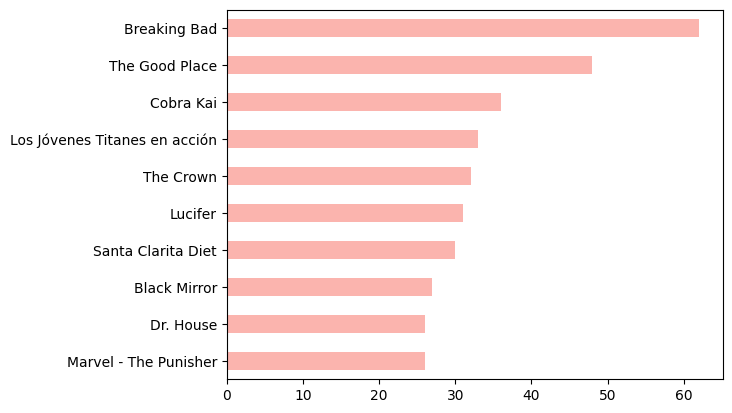

In [70]:
df.loc[df.tipo == 'serie'].nivel1.value_counts(ascending = True).tail(10).plot.barh(cmap = 'Pastel1');

Echo en falta mi serie favorita! BREAKING BAD. Vamos a hacer una consulta de los títulos que incluyan ese nombre para ver por qué.

In [79]:
df[df.Title.str.contains('Breaking').fillna(False)]


,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,año,mes,dia_mes,dia_semana
fecha,,,,,,,,,,,
2024-01-31,Breaking Bad: Temporada 5: Adquisición,serie,Breaking Bad,Temporada 5,Adquisición,None,None,2024,January,31,Wednesday
2024-01-31,Breaking Bad: Temporada 5: Carga de muerte,serie,Breaking Bad,Temporada 5,Carga de muerte,None,None,2024,January,31,Wednesday
2024-01-30,Breaking Bad: Temporada 5: 51 (Cincuenta y uno),serie,Breaking Bad,Temporada 5,51 (Cincuenta y uno),None,None,2024,January,30,Tuesday
2024-01-30,Breaking Bad: Temporada 5: Peligro,serie,Breaking Bad,Temporada 5,Peligro,None,None,2024,January,30,Tuesday
2024-01-29,Breaking Bad: Temporada 5: Madrigal,serie,Breaking Bad,Temporada 5,Madrigal,None,None,2024,January,29,Monday
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-20,Breaking Bad: Temporada 5: Enterrado,serie,Breaking Bad,Temporada 5,Enterrado,None,None,2020,July,20,Monday
2020-07-20,Breaking Bad: Temporada 5: Dinero sangriento,serie,Breaking Bad,Temporada 5,Dinero sangriento,None,None,2020,July,20,Monday
2020-07-20,Breaking Bad: Temporada 5: Planeando sobre todos,serie,Breaking Bad,Temporada 5,Planeando sobre todos,None,None,2020,July,20,Monday


¿Qué día de la semana suelo ver más series?

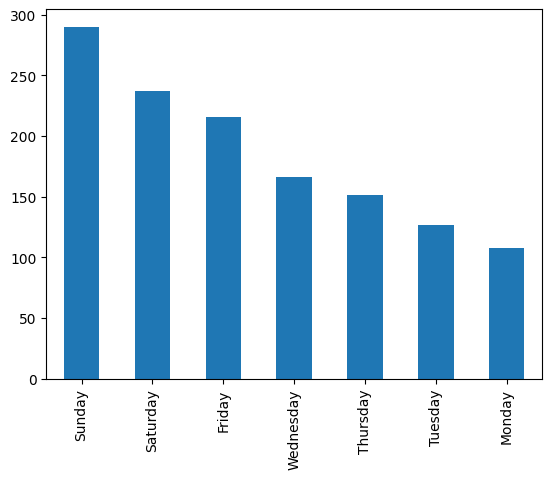

In [80]:
df.loc[df.tipo == 'serie', 'dia_semana'].value_counts().plot(kind = 'bar');

¿Existen diferencias en cuando veo Netflix entre series y películas?

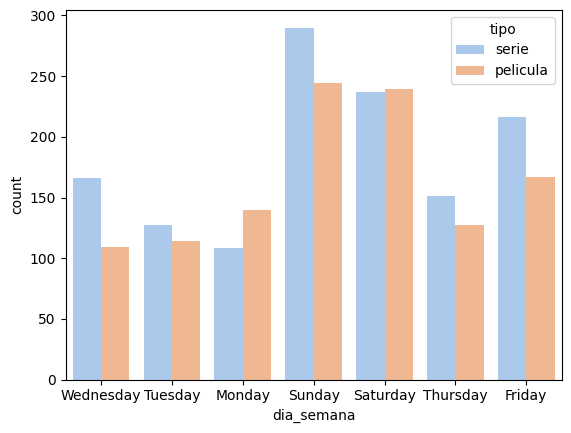

In [81]:
import seaborn as sns

sns.countplot(data = df, x = 'dia_semana', hue = 'tipo', palette= 'pastel');

¿El consumo a lo largo del año es constante o hay meses que consumo más?

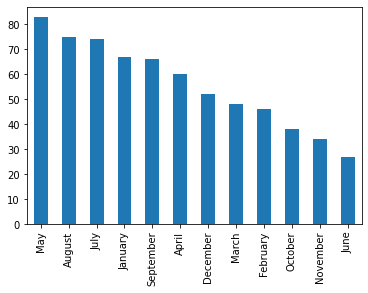

In [ ]:
df.loc[df.año < 2021].mes.value_counts().plot.bar();

¿Afectó el confinamiento a la cantidad de uso que hice de Netflix?

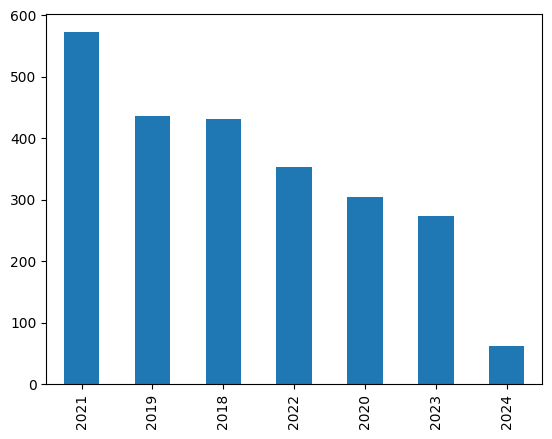

In [82]:
df.año.value_counts().plot.bar();